## THEx Models
Welcome to THEx models. Models can be run through Python interpreters- like this Jupyter Notebook! This Notebook will walk you through how to run the models. First, lets import all the current models implemented.

In [2]:
from models.hmc_model.hmc_model import HMCModel
from models.nb_model.nb_model import NaiveBayesModel

Next, let's run one of the models. We just need 3 things to run the models:
1. Have our repo properly setup (please view the README for extensive directions)
2. Have an idea of what features we'd like to filter on.

If you are unfamiliar with THEx there is just 1 thing to keep in mind: our dataset is massively disparate. This means there is no single row of data that has values across every single feature. Actually, our dataset looks like this picture:

![title](figures/thexdataset.png)

No 1 row goes all the way across. So, we need to select some columns to filter on. Our models allow 2 ways of filtering on columns:

- cols : Specific column names, provided as a list of strings. For example: ["NED_SDSS_u", "NED_SDSS_g", "NED_SDSS_r"]

- col_match : String to match column names on, provided as a list of strings. For example: ["AllWISE", "GALEX"] will filter on all columns containing those strings, which turns out to be: AllWISE_W1mag, AllWISE_W2mag, AllWISE_W3mag, AllWISE_W4mag, AllWISE_Jmag, AllWISE_Hmag, AllWISE_Kmag, NED_GALEX_FUV, NED_GALEX_NUV




Features Used
------------------
, NED_GALEX_FUV, NED_GALEX_NUV, transient_type
Counts per Class
------------------ 
Ia : 500
II : 376
Ic : 70
II P : 64
Ib : 51
IIn : 41
I : 30
Ib/c : 20
IIb : 16
Ia-91T : 10
Node: Ia Pec has already been assigned parent: I Pec
Node: Ib has already been assigned parent: I
Node: Ic has already been assigned parent: I
Node: II P-97D has already been assigned parent: II Pec
Node: IIn P has already been assigned parent: II P
Node: IIn L has already been assigned parent: II L
Node: IIn Pec has already been assigned parent: II Pec
Node: TDE has already been assigned parent: TTypes
└─TTypes
  ├─CC
  │ └─II
  │   ├─II L
  │   │ └─IIn L
  │   ├─II P
  │   │ ├─II P Pec
  │   │ └─IIn P
  │   ├─II Pec
  │   │ ├─II P-97D
  │   │ └─IIn Pec
  │   ├─IIb
  │   │ └─IIb Pec
  │   ├─IIc
  │   └─IIn
  ├─GRB
  │ ├─LGRB
  │ └─SGRB
  ├─I
  │ ├─I Pec
  │ │ ├─I-faint
  │ │ ├─I-rapid
  │ │ └─Ia Pec
  │ │   ├─Ia CSM
  │ │   ├─Ia-00cx
  │ │   ├─Ia-02cx
  │ │   ├─Ia-09dc
  │ │   ├─

/Users/marina/research/astro_research/code/thex_model/thex_data/data_prep.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[TARGET_LABEL] = df[TARGET_LABEL].apply(lambda x: int(cat_code[x]))
/Users/marina/research/astro_research/code/thex_model/thex_data/../../libraries/hmc/hmc/hmc.py:228: NoSamplesForStageWarning: No samples to fit for stage II L
  stage['stage'],  NoSamplesForStageWarning)
/Users/marina/research/astro_research/code/thex_model/thex_data/../../libraries/hmc/hmc/hmc.py:228: NoSamplesForStageWarning: No samples to fit for stage II Pec
  stage['stage'],  NoSamplesForStageWarning)
/Users/marina/research/astro_research/code/thex_model/thex_data/../../libraries/hmc/hmc/hmc.py:228: NoSamplesForStageWarning: No samples to fit for stage GRB
  stage[

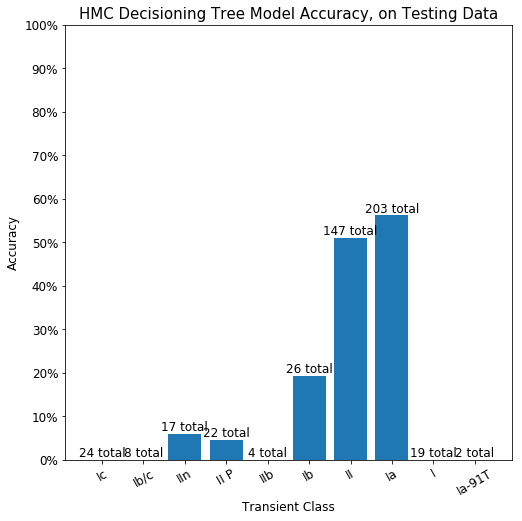

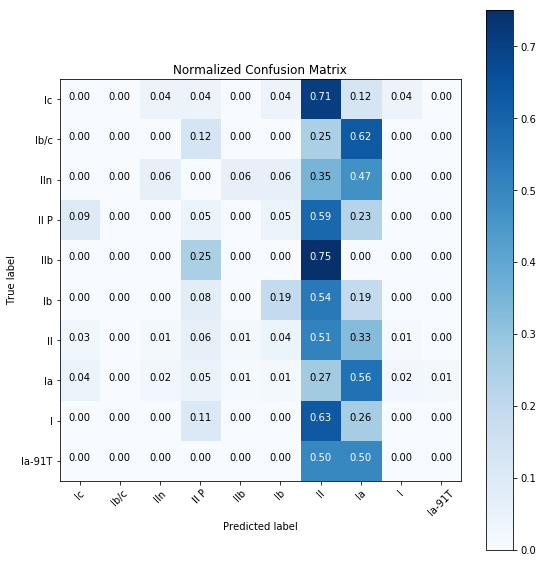

In [3]:
HMCModel(col_match = ["ALLWISE", "GALEX"])

And you're done! That's all you need to run our models. There are many optional parameters to be aware of though:
- test_on_train (default = False) : Boolean flag that if True, will test on training data. This helps to evaluate how well the model captures patterns in the training data. 
- incl_redshift (default = False) : Boolean flag that if True, will use redshift as a feature. 
- folds (default = 3) : Number of folds to use in k-fold Cross Validation. 

Let's change some of these flags around in Naive Bayes to get an idea of their impact:


Features Used
------------------
, NED_GALEX_FUV, NED_GALEX_NUV, PS1_gmag, PS1_rmag, PS1_imag, PS1_zmag, PS1_ymag, transient_type, redshift
Counts per Class
------------------ 
Ia : 500
II : 310
Ic : 58
II P : 51
Ib : 42
I : 28
IIn : 28
Ib/c : 17
IIb : 11
TDE : 9


/Users/marina/research/astro_research/code/thex_model/thex_data/data_prep.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[TARGET_LABEL] = df[TARGET_LABEL].apply(lambda x: int(cat_code[x]))
/Users/marina/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)



Priors
------------------
Ia : 0.1
II P : 0.1
IIb : 0.1
II : 0.1
I : 0.1
Ib/c : 0.1
Ic : 0.1
IIn : 0.1
TDE : 0.1
Ib : 0.1


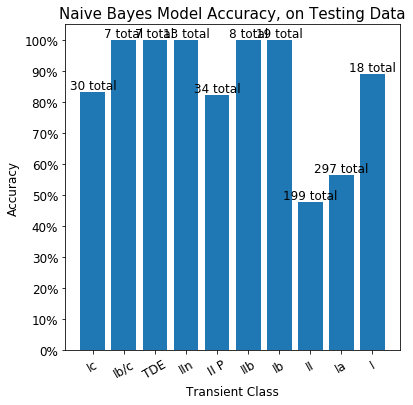

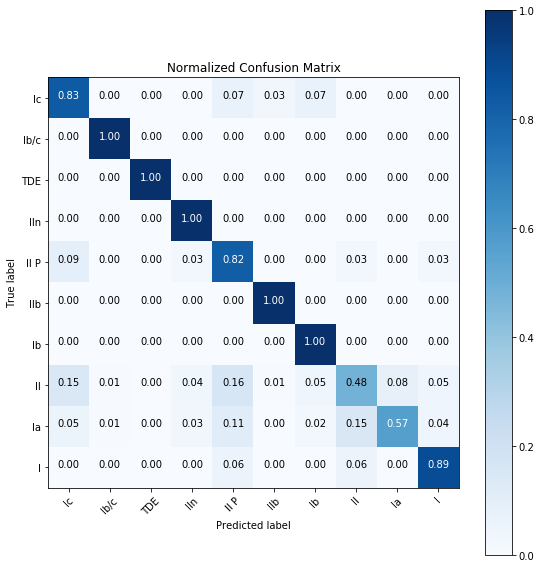

In [7]:
NaiveBayesModel(col_match = ["ALLWISE", "GALEX", "PS1"], 
                test_on_train = True,
                incl_redshift = True)